# Business Understanding

The serum concentration of gamma-glutamyl transpeptidase (γ-GTP) could act as a marker of oxidative stress, and oxidative stress has been reported to play a crucial role in the pathogenesis of both of atherosclerosis and hypertension. As aging is also known to be associated with oxidative stress, γ-GTP could act as a marker of risk factor in age-related disease such as atherosclerosis and hypertension in elderly subjects.

The goal of my work is to **predict level of γ-GTP**  based on bio-signals of the patient.



I use [medical data set](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking) from the Kaggle.

This dataset is a collection of basic health biological signal data.

Data shape : (55692, 27)

* ID : index
* gender
* age : 5-years gap
* height(cm)
* weight(kg)
* waist(cm) : Waist circumference length
* eyesight(left)
* eyesight(right)
* hearing(left)
* hearing(right)
* systolic : Blood pressure
* relaxation : Blood pressure
* fasting blood sugar
* Cholesterol : total
* triglyceride
* HDL : cholesterol type
* LDL : cholesterol type
* hemoglobin
* Urine protein
* serum creatinine
* AST : glutamic oxaloacetic transaminase type
* ALT : glutamic oxaloacetic transaminase type
* **Gtp : γ-GTP**
* oral : Oral Examination status
* dental caries
* tartar : tartar status
* smoking

In [2]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 29.4 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.2 MB/s eta 0:00:0000:0100:01


In [4]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 42.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.4 MB/s eta 0:00:00


In [6]:
!pip install sklearn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=75446e5c4c4fa1c3f1cac299ad3b4a7129dc508e4b5827aab61cb7e8212a4478
  Stored in directory: /Users/anastasiyapunko/Library/Caches/pip/wheels/5f/28/a6/4e4fc2959e4ed9b33bf517703534fd8b19b76a842f74c9ed4c
Successfully built sklearn


In [9]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 30.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 49.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 41.8 MB/s eta 0:00:00


In [11]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 39.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 56.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 41.5 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error  
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as metric
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import torch

In [14]:
df = pd.read_csv("/Users/anastasiyapunko/Downloads/archive-2/smoking.csv")
df.head(n=10)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
5,5,M,30,180,75,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,0
6,6,M,40,160,60,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,1
7,7,M,45,165,90,96.0,1.2,1.0,1.0,1.0,...,15.0,1.0,1.3,38.0,71.0,111.0,Y,0,Y,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
9,10,M,45,175,75,89.0,1.0,1.0,1.0,1.0,...,16.0,1.0,0.8,26.0,24.0,63.0,Y,0,N,0


# Data understanding

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [16]:
# print the 'shape' of the matrix
print(f"Rows x columns: {df.shape}")

# Check the total number of NAs
print(f"Total NA values: {df.isna().sum().sum()}")

Rows x columns: (55692, 27)
Total NA values: 0


In [18]:
summary=df.groupby(["gender","smoking"])[["age", "weight(kg)","height(cm)", 'Gtp', 'triglyceride', 'Cholesterol', 'hemoglobin', 'systolic', 'LDL']].mean().round(0)
summary

age  weight(kg)  height(cm)   Gtp  triglyceride  Cholesterol  \
gender smoking                                                                  
F      0        49.0        56.0       156.0  24.0         103.0        201.0   
       1        46.0        56.0       157.0  36.0         124.0        199.0   
M      0        42.0        71.0       170.0  40.0         125.0        194.0   
       1        41.0        72.0       170.0  56.0         151.0        195.0   

                hemoglobin  systolic    LDL  
gender smoking                               
F      0              13.0     119.0  118.0  
       1              13.0     116.0  110.0  
M      0              15.0     123.0  115.0  
       1              16.0     123.0  113.0

<Axes: ylabel='count'>

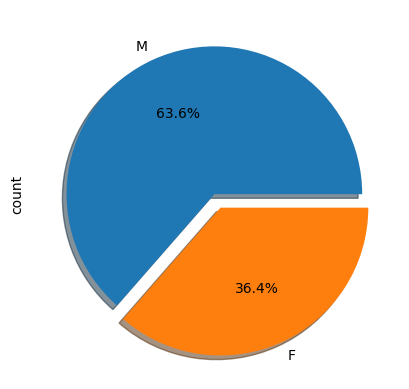

In [19]:
# how much percentage Gender in the dataset
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

Visualization with box plots

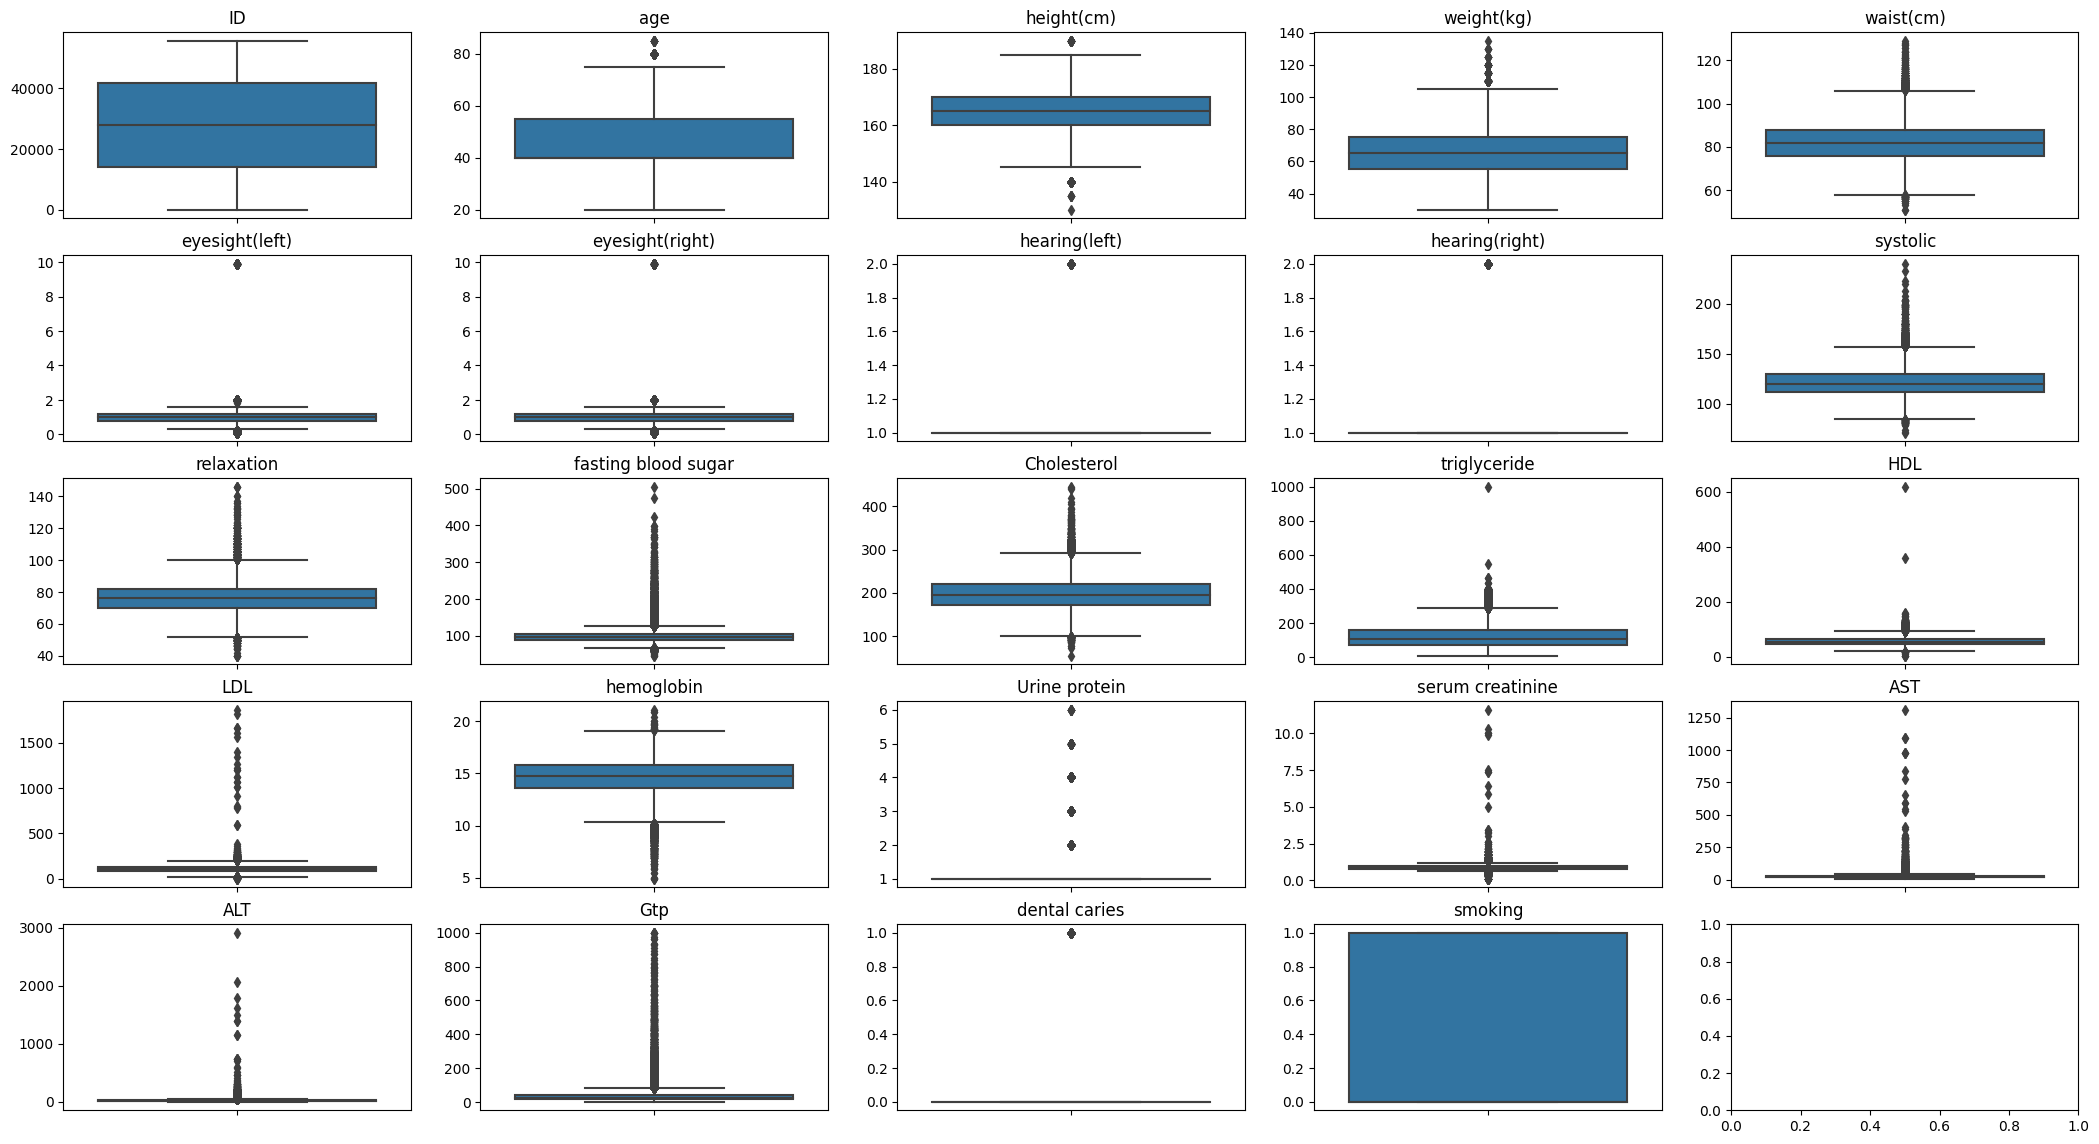

In [20]:
# Get numeric columns only
numeric = list(df.select_dtypes(include=np.number).columns)

# Create figure with 20 subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(26, 14))
# By default, axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()

# Plot boxplot for each numeric column
for col, ax in zip(numeric, axes):
  sns.boxplot(y = df[col], ax=ax)
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

One way to deal with outliers is to "trim" the data and keep only records where values in each column are within [ α , 1- α ] percentiles.

In [21]:
print(f"Records before: {len(df)}")

# Get 0.01 and 0.99 percentile for each column, alpha = 0.01
low, high = 0.01, 0.99
quantiles = df[numeric].quantile([low, high])

for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col] >= low) & (df[col] <= high)
  df = df[mask]

print(f"Records after: {len(df)}")

Records before: 55692
Records after: 42648


In [22]:
# Perform `describe` only for numeric columns
df[numeric].describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,...,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000,42648.000000
mean,27890.186926,43.844612,164.986869,65.954089,82.023338,1.003400,0.998410,1.022416,1.023143,121.223621,...,56.929586,115.262967,14.682346,1.059956,0.885486,24.683807,25.101599,35.675694,0.209482,0.369724
std,15765.254947,11.821962,8.998092,11.701133,8.388009,0.305982,0.304454,0.148034,0.150359,12.161487,...,13.186587,30.281755,1.392821,0.291334,0.178206,8.448419,14.675477,30.542273,0.406944,0.482736
min,557.000000,20.000000,145.000000,45.000000,62.500000,0.200000,0.200000,1.000000,1.000000,92.000000,...,32.000000,44.000000,10.100000,1.000000,0.500000,13.000000,8.000000,9.000000,0.000000,0.000000
25%,14213.750000,35.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,93.000000,13.700000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27934.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,114.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41552.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,65.000000,136.000000,15.700000,1.000000,1.000000,28.000000,30.000000,42.000000,0.000000,1.000000
max,55134.000000,75.000000,185.000000,100.000000,105.000000,1.500000,1.500000,2.000000,2.000000,159.000000,...,100.000000,202.000000,17.600000,3.000000,1.300000,80.000000,112.000000,242.000000,1.000000,1.000000


Histogram for each column using the built-in pandas method

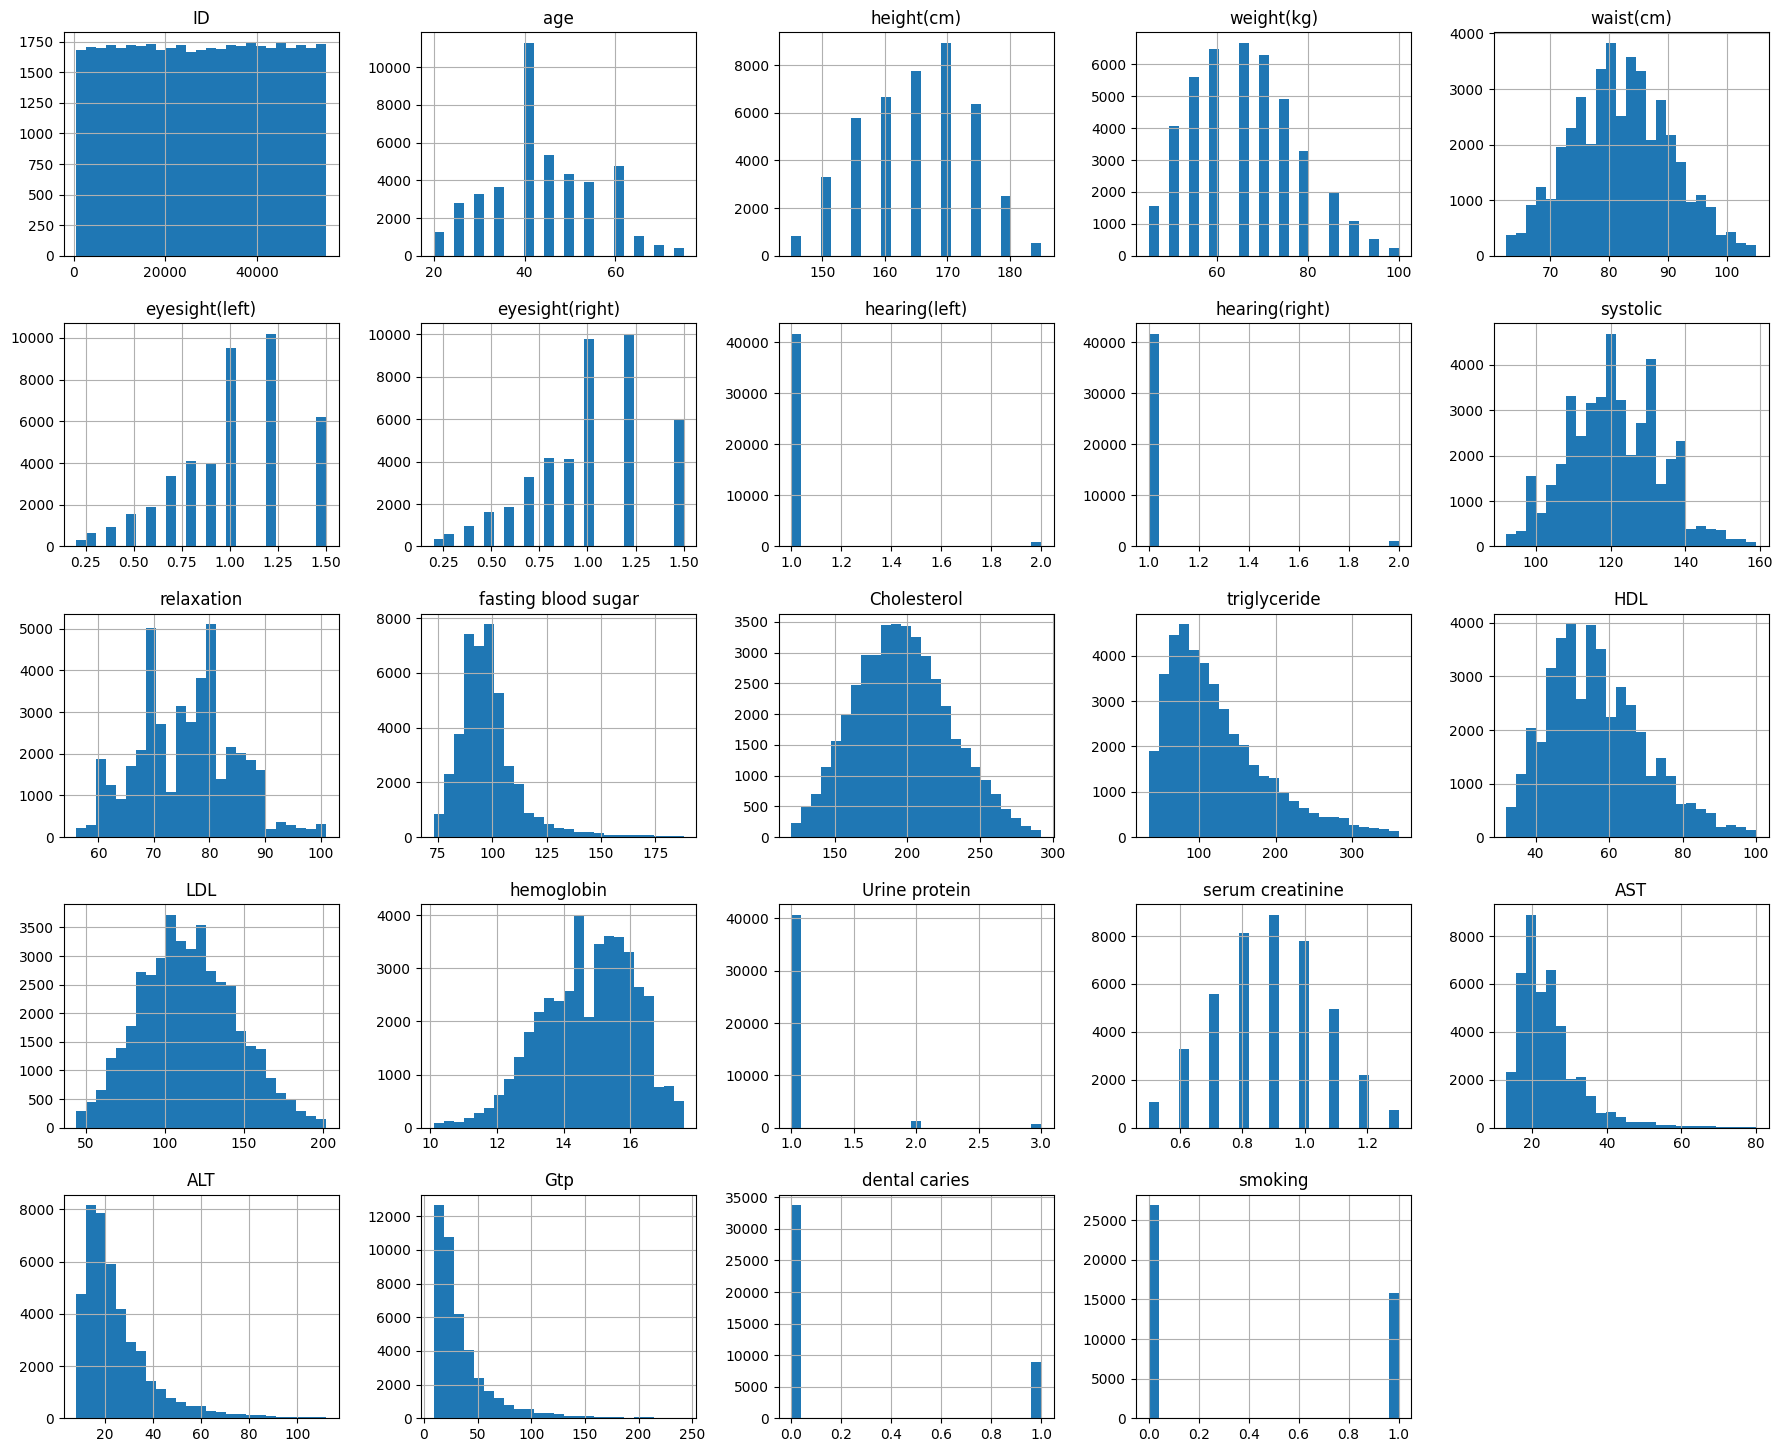

In [23]:
_ = df[numeric].hist(figsize=(22, 18), bins=25)

Correlation heatmap 

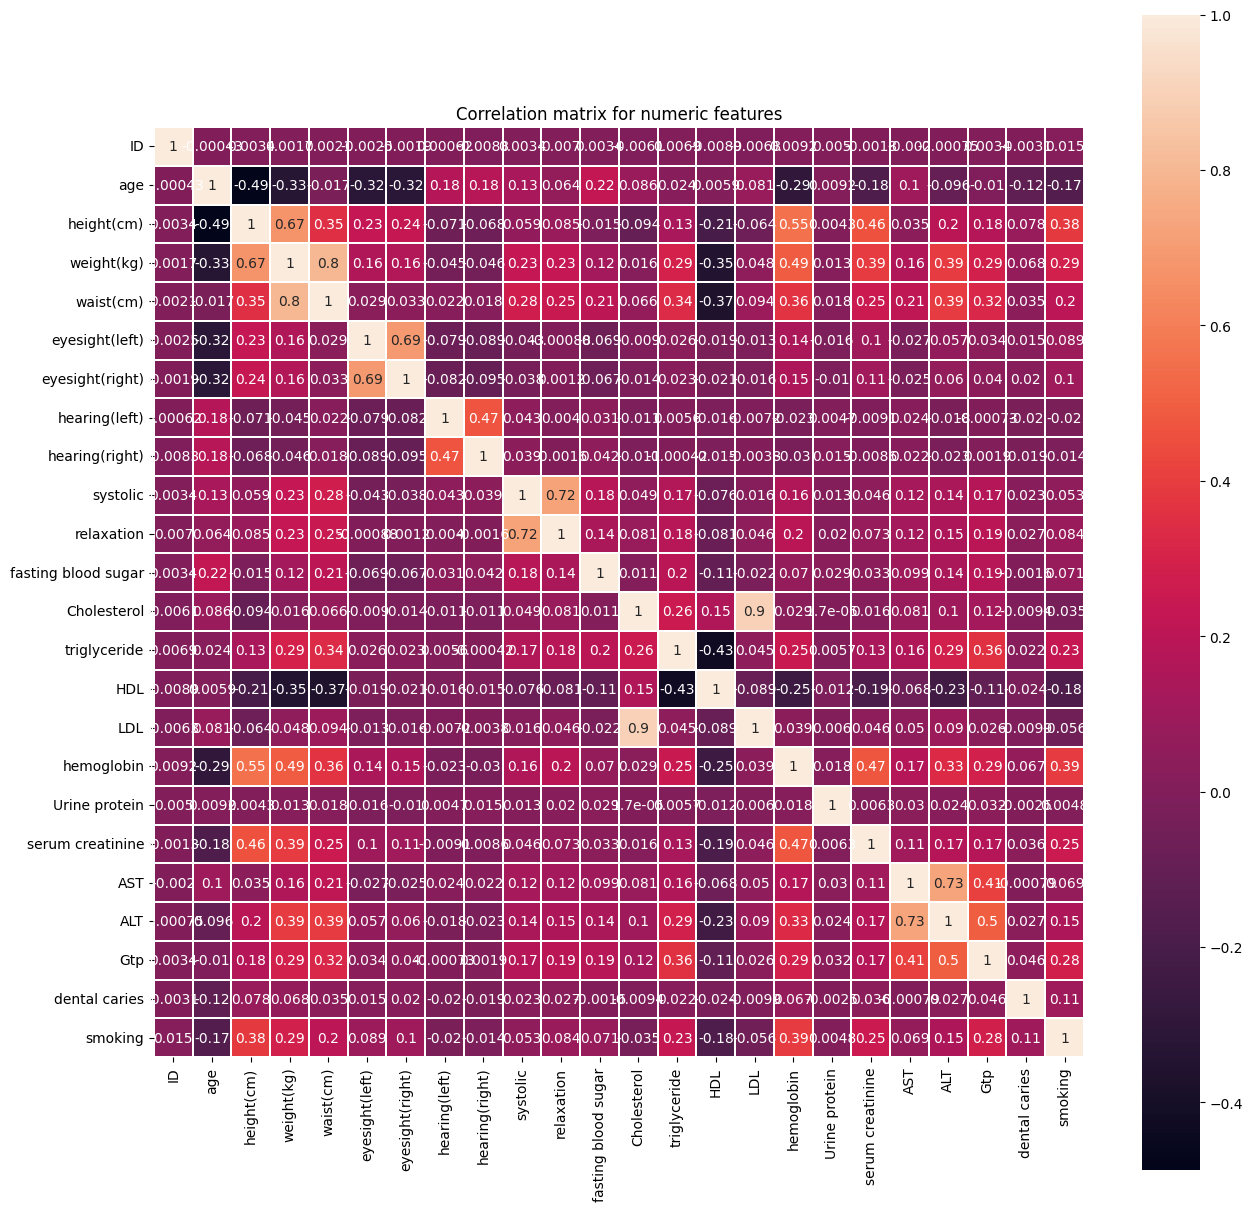

In [24]:
correlations = df[numeric].corr(method='pearson') 

plt.figure(figsize=(15,15))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix for numeric features")
plt.show()

In [25]:
# Replace some columns with dummy variables
ddf = pd.get_dummies(df, columns=['gender'])
ddf = pd.get_dummies(ddf, columns=['oral'])
ddf = pd.get_dummies(ddf, columns=['tartar'])

In [26]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42648 entries, 444 to 55576
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   42648 non-null  int64  
 1   age                  42648 non-null  int64  
 2   height(cm)           42648 non-null  int64  
 3   weight(kg)           42648 non-null  int64  
 4   waist(cm)            42648 non-null  float64
 5   eyesight(left)       42648 non-null  float64
 6   eyesight(right)      42648 non-null  float64
 7   hearing(left)        42648 non-null  float64
 8   hearing(right)       42648 non-null  float64
 9   systolic             42648 non-null  float64
 10  relaxation           42648 non-null  float64
 11  fasting blood sugar  42648 non-null  float64
 12  Cholesterol          42648 non-null  float64
 13  triglyceride         42648 non-null  float64
 14  HDL                  42648 non-null  float64
 15  LDL                  42648 non-null  fl

# Baseline

## Train/test split

In [27]:
Y = ddf.pop("Gtp")
Y = Y.values
X = ddf.values


print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 42
)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")


Before:
	X: (42648, 28); Y: (42648,)
Train:
	X: (29853, 28); Y: (29853,)
Test:
	X: (12795, 28); Y: (12795,)


Power transform

In [28]:
ptransform = PowerTransformer(standardize=False).fit(X_train)
print("Estimated lambda: ", ptransform.lambdas_)

X_train = ptransform.transform(X_train)
X_test = ptransform.transform(X_test)

Estimated lambda:  [  0.72675383   0.69452304   2.02271098   0.05613733   0.51595931
   1.34051518   1.35788166 -47.64085805 -50.51894444   0.33371707
   0.47523603  -2.25682225   0.42666877  -0.08981874  -0.147048
   0.66287168   2.73201035 -44.87500728   0.82977183  -0.86468723
  -0.46179023  -6.55173726  -2.37625867  -2.7492089    2.7492089
   7.3174256   -0.97019128   0.97019128]


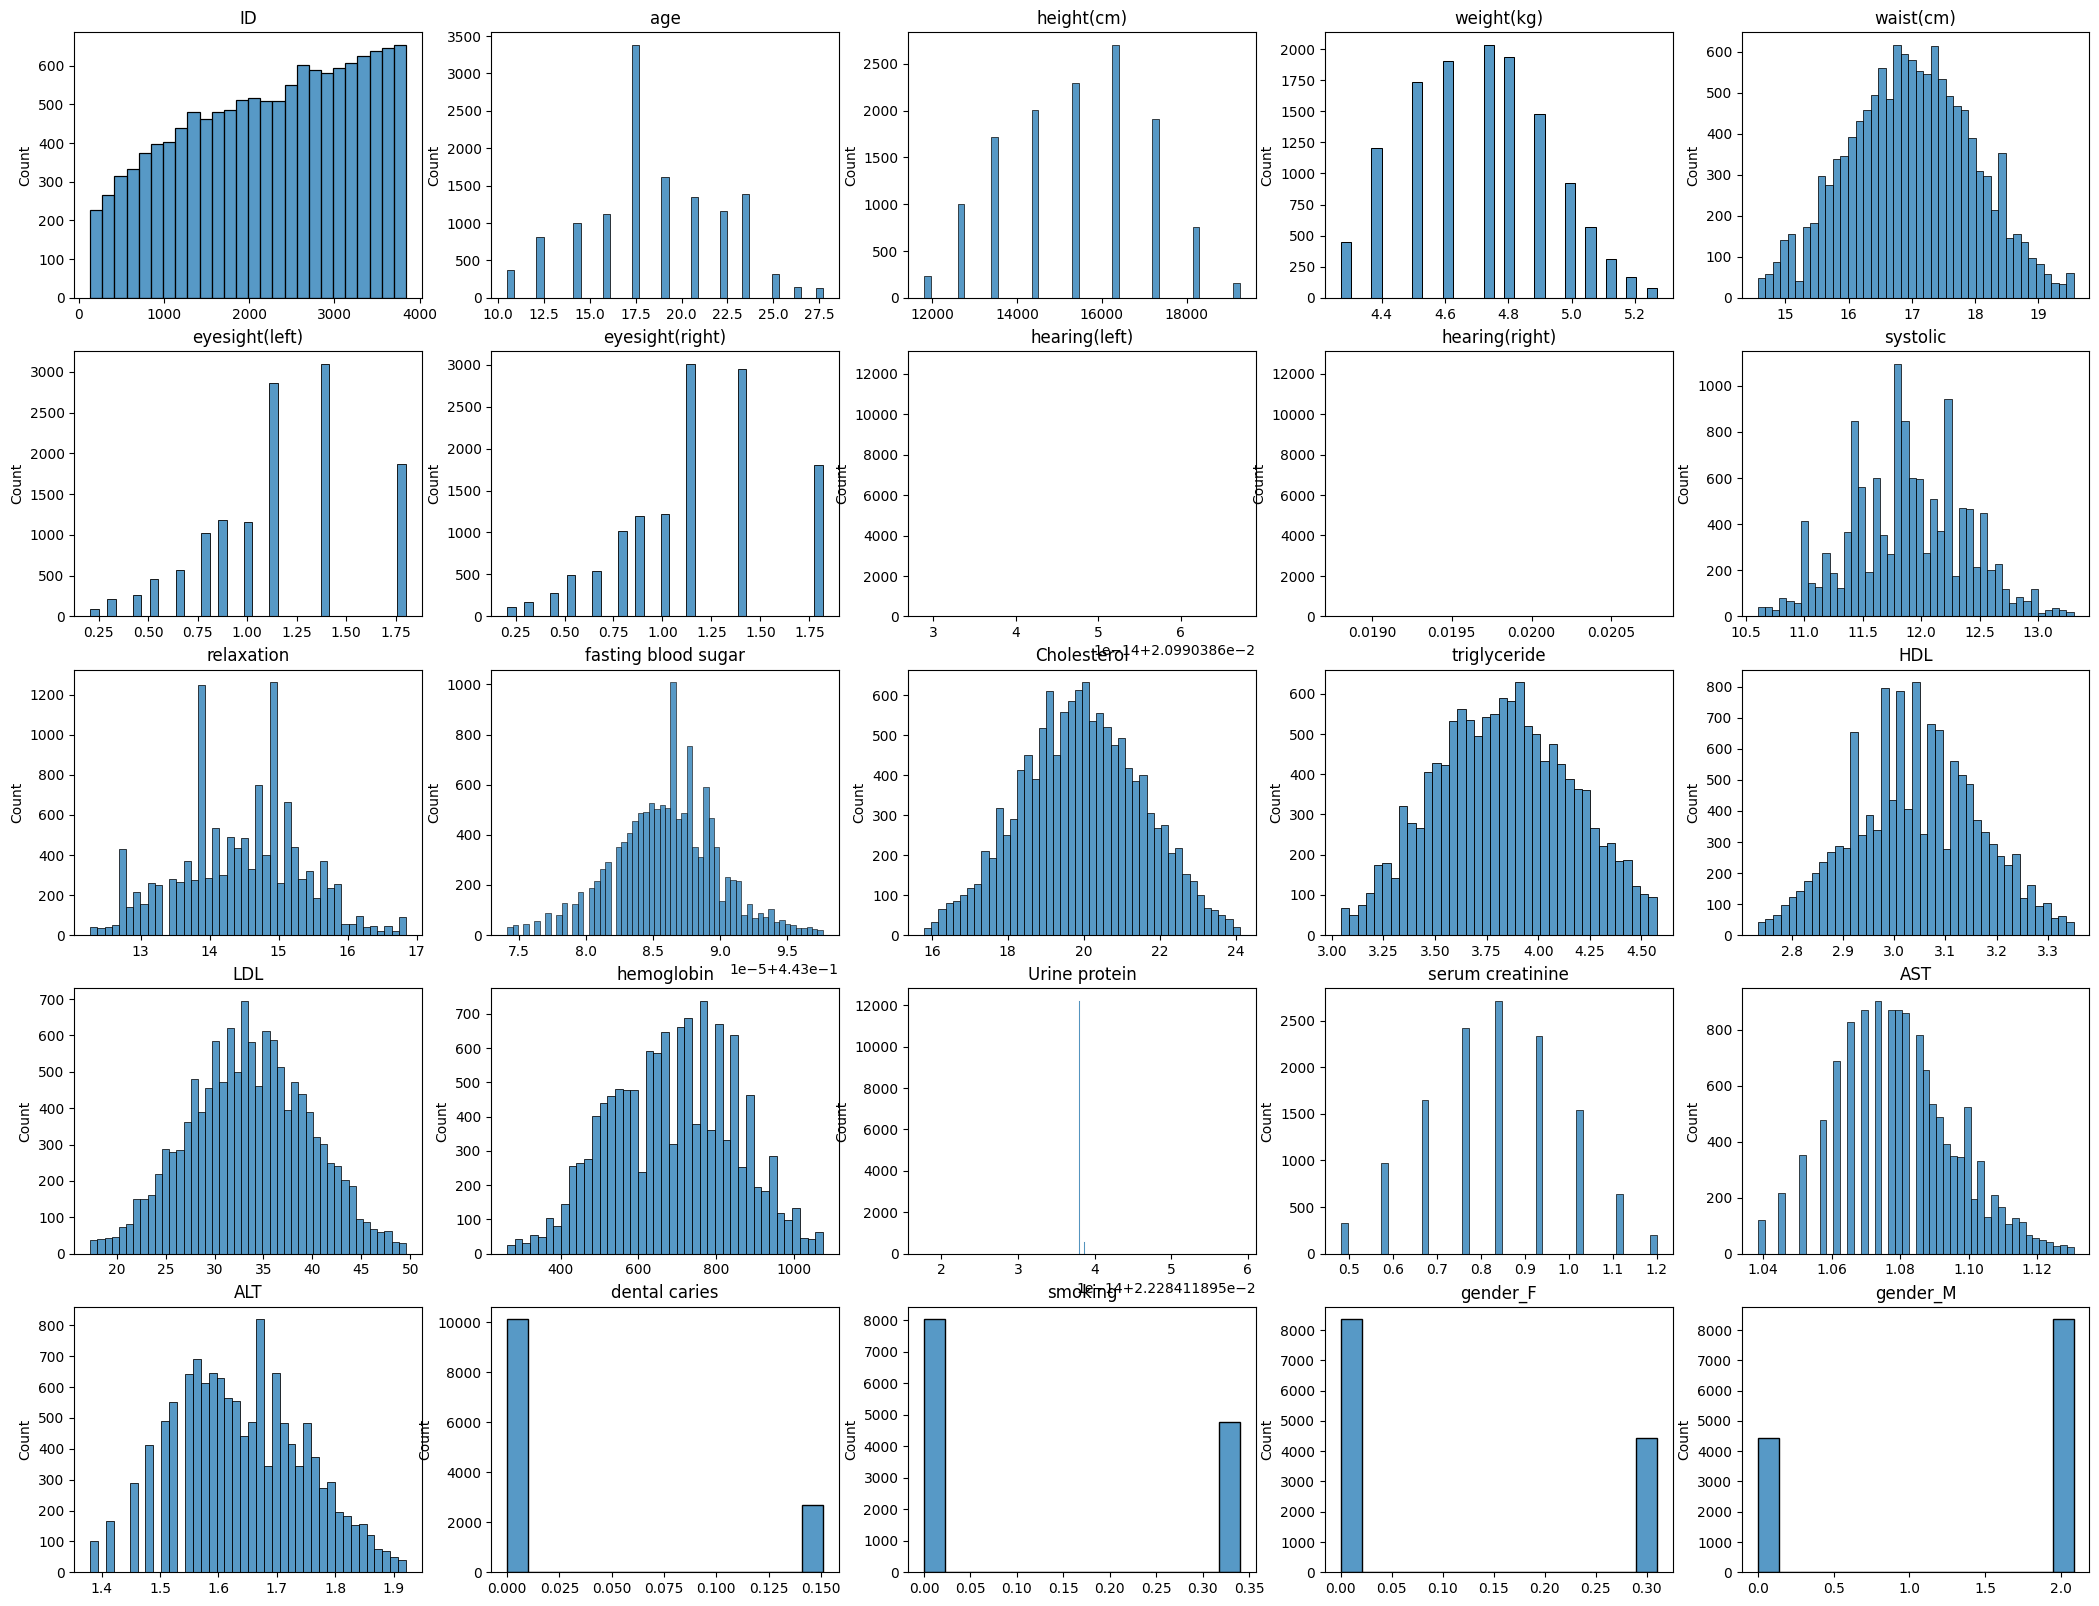

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(26, 20))
axes = axes.ravel()

X, Y = X_test, X_train
for ax, col in zip(axes, range(X.shape[1])):
  sns.histplot(x=X[:, col], ax=ax)
  ax.set_title(ddf.columns[col])

Standardization

In [30]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#Check a random column
colind = 0
print(f"Train: {X_train[:, colind].mean():.3f}, {X_train[:, colind].std():.3f}")
print(f"Test: {X_test[:, colind].mean():.3f}, {X_test[:, colind].std():.3f}")

Train: -0.000, 1.000
Test: -0.017, 1.006


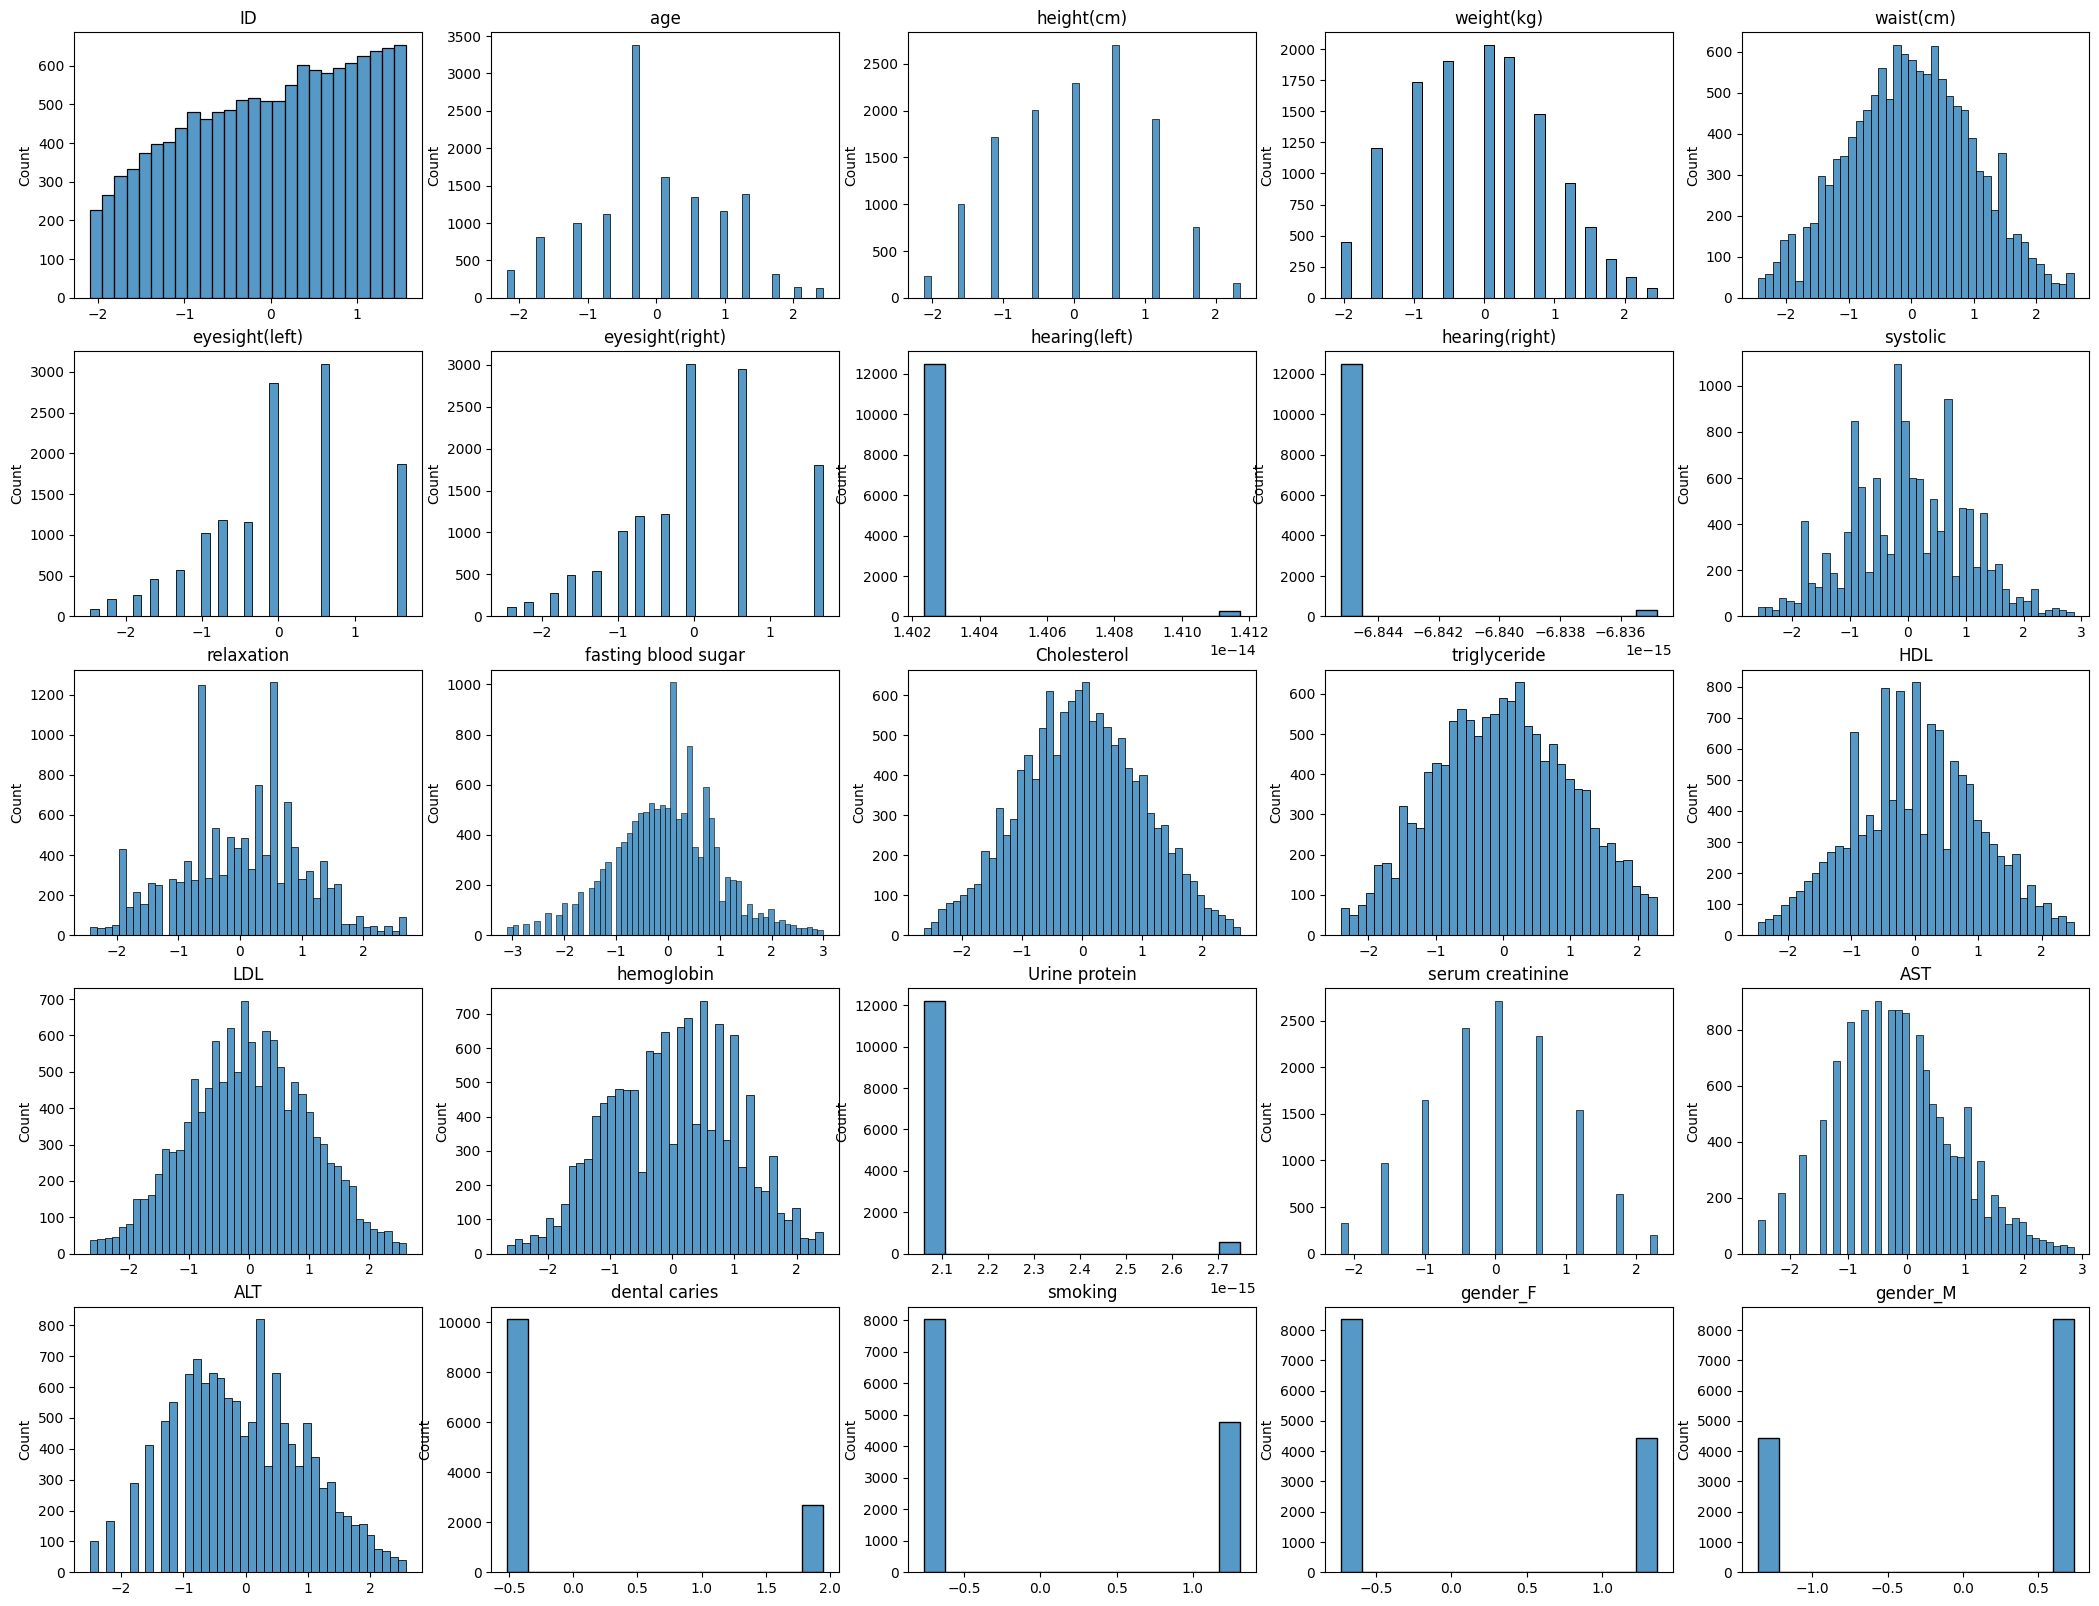

In [32]:
#Visual check
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(26, 20))
axes = axes.ravel()

X = X_test
for ax, col in zip(axes, range(X.shape[1])):
  sns.histplot(x=X[:, col], ax=ax)
  ax.set_title(ddf.columns[col])

### Target performance measure

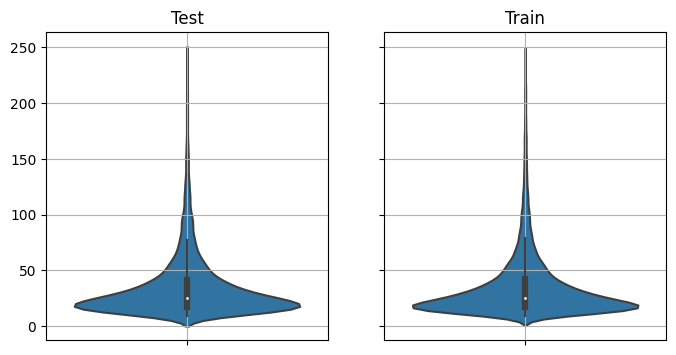

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

for ax, title, data in zip(axes, ["Test", "Train"], [Y_test, Y_train]):
  sns.violinplot(y=data, ax=ax)
  ax.grid()
  ax.set_title(title)

We have some outliers; therefore, we will use **mean absolute error (MAE)** as both our target loss and the target metric.

## Classical models.

### Elastic net/lasso

In [34]:
# Lasso - l1 norm 
# Ridge - l2 norm 
# Elastic Net - l1 and l2 norm

alpha = 0.1
models = {
    "Lasso": Lasso(alpha=alpha).fit(X_train, Y_train),
    "Ridge": Ridge(alpha=alpha * 1_000).fit(X_train, Y_train),
    "Elastic Net": ElasticNet(alpha=alpha).fit(X_train, Y_train)
}

# Train and print metrics
for name, X, Y in ("train", X_train, Y_train), ("test", X_test, Y_test):
  print(name)
  for mtype, model in models.items():
    mae = mean_absolute_error(Y, model.predict(X))
    print(f"\t{mtype}: {mae:.3f}")

train
	Lasso: 15.990
	Ridge: 16.016
	Elastic Net: 15.933
test
	Lasso: 15.912
	Ridge: 15.929
	Elastic Net: 15.844


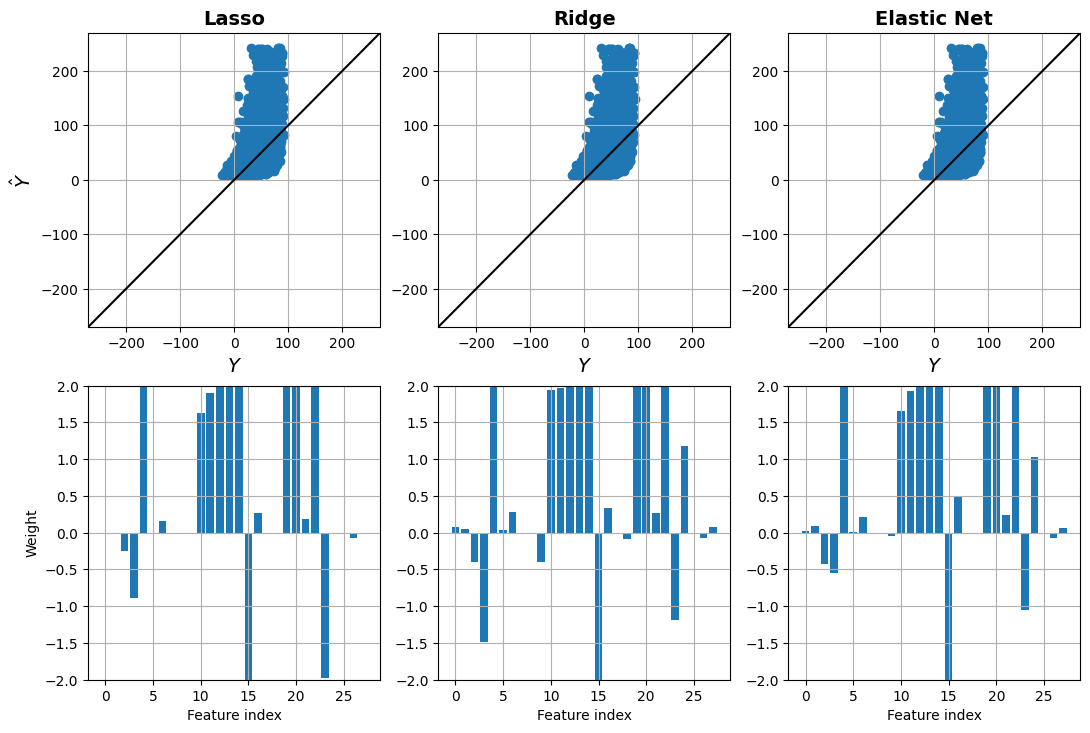

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12.8, 8.4))

for ind, (axes, (name, model)) in enumerate(zip(axes.T, models.items())):
  # Expected vs predicted
  sc = axes[0]
  Ypred = model.predict(X_train)
  sc.scatter(Ypred, Y_train)
  sc.grid()
  sc.set_xlabel("$Y$", fontsize=14)
  if ind == 0:
    sc.set_ylabel("$\hat{Y}$", fontsize=14)
  sc.set_title(name, fontweight='bold', fontsize=14)
  sc.set(xlim=(-270, 270), ylim=(-270, 270))
  sc.plot([0, 1], [0, 1], color='black', transform=sc.transAxes)

  # Weights barplot
  hs = axes[1]
  weights = model.coef_
  hs.bar(np.arange(len(weights)), weights)
  if ind == 0:
    hs.set_ylabel('Weight')
  hs.set(ylim=(-2, 2), xlabel='Feature index')
  hs.grid()

### Decision tree

In [39]:
tree = DecisionTreeRegressor(random_state=0)
decTree = tree.fit(X_train, Y_train).predict(X_test)

print(f"'Naive decision tree'-> {metric(Y_test, decTree)}")

'Naive decision tree'-> 15.825009769441188


### Random forest

In [40]:
forest = RandomForestRegressor(n_estimators=10)
rForest = forest.fit(X_train, Y_train).predict(X_test)

print(f"'Naive random forest'-> {metric(Y_test, rForest)}")

'Naive random forest'-> 13.561023837436498


### SVR

In [41]:
svm = SVR(C=1.0, epsilon=0.1)
svr = svm.fit(X_train, Y_train).predict(X_test)

print(f"'Naive SVR'-> {metric(Y_test, svr)}")

'Naive SVR'-> 13.562968797534742


## Performance metrics of all models

In [56]:
print(f"'ElasticNet' -> {metric(Y_test, model.predict(X))}")
print(f"'Naive decision tree'-> {metric(Y_test, decTree)}")
print(f"'Naive random forest'-> {metric(Y_test, rForest)}")
print(f"'Naive SVR'-> {metric(Y_test, svr)}")

'ElasticNet' -> 15.843968219531366
'Naive decision tree'-> 15.825009769441188
'Naive random forest'-> 13.561023837436498
'Naive SVR'-> 13.562968797534742


The mean absolute error between predicted values and actual values in our data is the lowest in the Random forest. Consequently, this model fits the dataset better.

# Modeling

### Elastic net

In [37]:
grid = {
    "alpha": np.linspace(0.1, 1, num=10),
    "l1_ratio": np.linspace(0.1, 1, num=10),
}

grid = GridSearchCV(
    ElasticNet(), grid, cv=3, scoring="neg_mean_absolute_error"
)

elnet = grid.fit(X_train, Y_train).predict(X_test)

print(f"'ElasticNet' -> {metric(Y_test, elnet)}")
print(f"\t{grid.best_params_}")

'ElasticNet' -> 15.620047599447771
	{'alpha': 0.8, 'l1_ratio': 0.5}


In [58]:
enet = ElasticNet(alpha=0.8, l1_ratio=0.5)

y_pred_enet = enet.fit(X_train, Y_train).predict(X_test)
mae_enet = metric(Y_test, y_pred_enet)
r2_score_enet = r2_score(Y_test, y_pred_enet)
print(enet)
print("MAE on test data : %f" % mae_enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.8)
MAE on test data : 15.620048
r^2 on test data : 0.327798


#### The model predicts only 33% of our data.

### Decision tree

In [ ]:
grid = {
    "criterion": ["absolute_error", "squared_error"],
    "max_depth": np.arange(5, 10),
    "min_samples_leaf": [5, 10, 25, 50]
}

grid = GridSearchCV(
    DecisionTreeRegressor(), grid, cv=3, scoring="neg_mean_absolute_error"
)

In [ ]:
predY = grid.fit(X_train, Y_train).predict(X_test)

print(f"'Optimized decision tree' -> {metric(Y_test, predY)}")
print(f"\t{grid.best_params_}")

'Optimized decision tree' -> 14.096678389996093
	{'criterion': 'absolute_error', 'max_depth': 9, 'min_samples_leaf': 50}


In [59]:
optDecTree = DecisionTreeRegressor(criterion='absolute_error', max_depth=9, min_samples_leaf=50)

y_pred_optDecTree = optDecTree.fit(X_train, Y_train).predict(X_test)
mae_optDecTree = metric(Y_test, y_pred_optDecTree)
r2_score_optDecTree = r2_score(Y_test, y_pred_optDecTree)
print(optDecTree)
print("MAE on test data : %f" % mae_optDecTree)
print("r^2 on test data : %f" % r2_score_optDecTree)

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=50)
MAE on test data : 14.095584
r^2 on test data : 0.308762


#### The model predicts only 31% of our data.

### Random forest

In [49]:
grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 30, None],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [5, 10, 20, 60]
}

grid = GridSearchCV(
    RandomForestRegressor(), grid
)

In [50]:
predY = grid.fit(X_train, Y_train).predict(X_test)

print(f"'Optimized Random Forest' -> {metric(Y_test, predY)}")
print(f"\t{grid.best_params_}")


'Optimized Random Forest' -> 12.959412530936564
	{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}


In [62]:
optRForest = RandomForestRegressor(bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60)

y_pred_optRForest = optRForest.fit(X_train, Y_train).predict(X_test)
mae_optRForest = metric(Y_test, y_pred_optRForest)
r2_score_optRForest = r2_score(Y_test, y_pred_optRForest)
print(optRForest)
print("MAE on test data : %f" % mae_optRForest)
print("r^2 on test data : %f" % r2_score_optRForest)

RandomForestRegressor(n_estimators=60)
MAE on test data : 12.937301
r^2 on test data : 0.506369


The model predicts only 50.6% of our data.

### SVR

In [53]:
grid = {
    'C': [1e0, 1e1, 1e2, 1e3],
    'gamma':np.logspace(-2, 2, 5)
}

grid = GridSearchCV(
    SVR(), grid
)

predY = grid.fit(X_train, Y_train).predict(X_test)

print(f"'SVR' -> {metric(Y_test, predY)}")
print(f"\t{grid.best_params_}")


'SVR' -> 13.549022576933316
	{'C': 100.0, 'gamma': 0.1}


In [63]:
optSVR = SVR(C=100.0, gamma=0.1, epsilon=0.1)

y_pred_optSVR = optSVR.fit(X_train, Y_train).predict(X_test)
mae_optSVR = metric(Y_test, y_pred_optSVR)
r2_score_optSVR = r2_score(Y_test, y_pred_optSVR)
print(optSVR)
print("MAE on test data : %f" % mae_optSVR)
print("r^2 on test data : %f" % r2_score_optSVR)

SVR(C=100.0, gamma=0.1)
MAE on test data : 13.549023
r^2 on test data : 0.400647


The model predicts only 40% of our data.

### Gradient boosting models. 

**Gradient boosting** is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

Gradient boosting involves three elements:

- A loss function to be optimized.
- A weak learner to make predictions.
- An additive model to add weak learners to minimize the loss function.

In [ ]:
gb = GradientBoostingRegressor()
grBoosting = gb.fit(X_train, Y_train).predict(X_test)

print(f"'Naive Gradient Boosting'-> {metric(Y_test, grBoosting)}")

'Naive Gradient Boosting'-> 14.481223930949666


In [ ]:
grid = {
    "learning_rate": [0.1, 0.2, 0.4],
    "n_estimators": [50, 100, 250],
    "subsample": [0.75, 1],
    "max_depth": [3, 4],
    "min_samples_leaf": [10, 25]
}

cv = GridSearchCV(GradientBoostingRegressor(),
                  grid, scoring="neg_mean_absolute_error", cv=3)
predY = cv.fit(X_train, Y_train).predict(X_test)

print(f"Gradient boosting -> {metric(Y_test, predY)}")
print(f"\t{cv.best_params_}")

Gradient boosting -> 14.250984295685573
	{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 10, 'n_estimators': 250, 'subsample': 0.75}


In [64]:
grB = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=10, n_estimators=250, subsample=0.75)

y_pred_grB = grB.fit(X_train, Y_train).predict(X_test)
mae_grB = metric(Y_test, y_pred_grB)
r2_score_grB = r2_score(Y_test, y_pred_grB)
print(grB)
print("MAE on test data : %f" % mae_grB)
print("r^2 on test data : %f" % r2_score_grB)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=10, n_estimators=250,
                          subsample=0.75)
MAE on test data : 14.310788
r^2 on test data : 0.408585


The model predicts only 41% of our data.

### Performance metrics of all models.

In [65]:
print("MAE")
print(f"'ElasticNet' -> {metric(Y_test, y_pred_enet)}")
print(f"'Optimized decision tree'-> {metric(Y_test, y_pred_optDecTree)}")
print(f"'Optimized random forest'-> {metric(Y_test, y_pred_optRForest)}")
print(f"'SVR'-> {metric(Y_test, y_pred_optSVR)}")
print(f"'Gradient Boosting'-> {metric(Y_test, y_pred_grB)}")

print("R2")
print(f"'ElasticNet' -> {r2_score(Y_test, y_pred_enet)}")
print(f"'Optimized decision tree'-> {r2_score(Y_test, y_pred_optDecTree)}")
print(f"'Optimized random forest'-> {r2_score(Y_test, y_pred_optRForest)}")
print(f"'SVR'-> {r2_score(Y_test, y_pred_optSVR)}")
print(f"'Gradient Boosting'-> {r2_score(Y_test, y_pred_grB)}")

MAE
'ElasticNet' -> 15.620047599447771
'Optimized decision tree'-> 14.09558421258304
'Optimized random forest'-> 12.937301029047806
'SVR'-> 13.549022576933316
'Gradient Boosting'-> 14.310787765678231
R2
'ElasticNet' -> 0.3277981060674128
'Optimized decision tree'-> 0.30876197458963983
'Optimized random forest'-> 0.5063690292575205
'SVR'-> 0.40064669700581756
'Gradient Boosting'-> 0.408585446605345


The mean absolute error between predicted values and actual values in our data is the lowest in the **Random forest**. Consequently, this model fits the dataset better.

# In Addition

### Feature importance analysis .

Feature importance (DecisionTree)

In [ ]:
# Estimated importance values are stored in the .feature_importances_
importance = pd.DataFrame(
    tree.feature_importances_, index=features, columns=['Importance']
).sort_values(by='Importance', ascending=False)
importance.head()

,Importance
ALT,0.275062
triglyceride,0.089889
AST,0.061126
HDL,0.055164
fasting blood sugar,0.045844


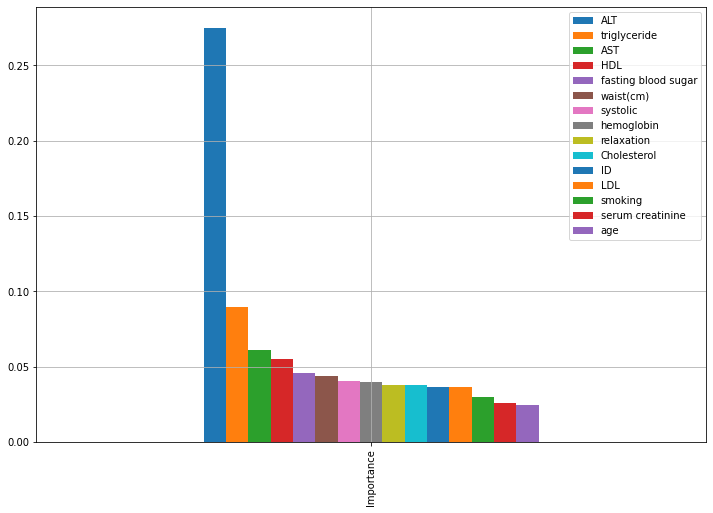

In [ ]:
plt.figure(figsize=(12, 8))
importance.iloc[:15].T.plot.bar(ax=plt.gca())
plt.grid()

Feature importance (RandomForest)

In [ ]:
importance = pd.DataFrame(
    forest.feature_importances_, index=features, columns=['Importance']
).sort_values(by='Importance', ascending=False)
importance.head()

,Importance
ALT,0.272345
triglyceride,0.095411
HDL,0.061318
AST,0.060001
fasting blood sugar,0.047507


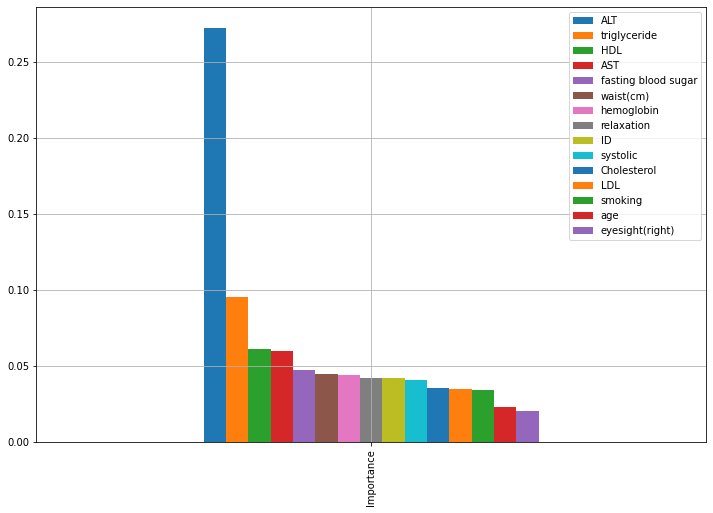

In [ ]:
plt.figure(figsize=(12, 8))
importance.iloc[:15].T.plot.bar(ax=plt.gca())
plt.grid()

Feature importance (GradientBoosting)

In [ ]:
importance = pd.DataFrame(
    gb.feature_importances_, index=features, columns=['Importance']
).sort_values(by='Importance', ascending=False)
importance.head()

,Importance
ALT,0.517352
triglyceride,0.129479
AST,0.092815
smoking,0.083697
HDL,0.054009


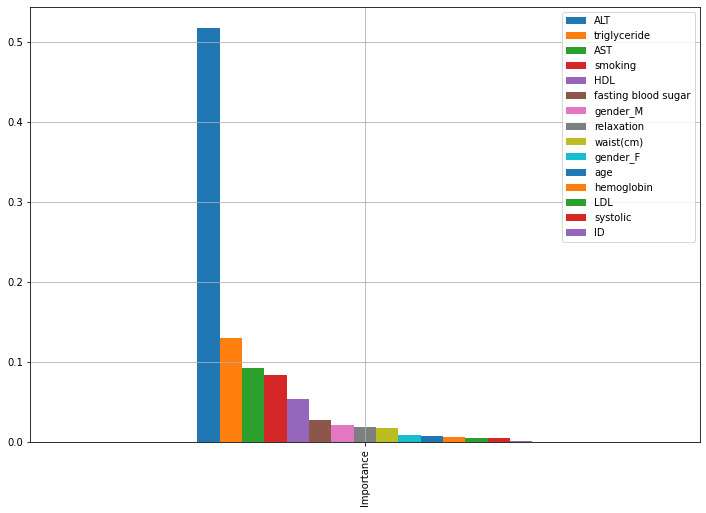

In [ ]:
plt.figure(figsize=(12, 8))
importance.iloc[:15].T.plot.bar(ax=plt.gca())
plt.grid()

The first and second most important features coincided in all the models. However, the Gradient Boosting importance value is higher.

### Neural networks. 

**Neural networks** are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria.

Neural networks are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

Neural network consists of three components:  Input, Hidden and Output layers.
**Training** consists of the selection of coefficients for each neuron in the layers so that with certain input signals we get the necessary set of output signals.
Neural networks are trained in two stages: forward error propagation and reverse error propagation.
Learning methods in a neural network are based on changing weights for each neuron to achieve necessary output parameters with given inputs. These methods minimize the error layer by layer in the neural network.


Prerequisites

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3)

In [ ]:
X_train, Y_train = torch.tensor(X_train, dtype=torch.float32), \
                 torch.tensor(Y_train, dtype=torch.float32)

X_val, Y_val = torch.tensor(X_val, dtype=torch.float32), \
             torch.tensor(Y_val, dtype=torch.float32)

X_test, Y_test = torch.tensor(X_test, dtype=torch.float32), \
               torch.tensor(Y_test, dtype=torch.float32)

In [ ]:
def make_model():
  model = torch.nn.Sequential(
      # 1
      torch.nn.Linear(28, 14),     # Fully-connected layers
      # torch.nn.ReLU(),              # Activation function
      # 2
      torch.nn.Linear(14, 7),
      # torch.nn.ReLU(),
      # 3
      torch.nn.Linear(7, 1),
      # torch.nn.ReLU()
      # No activation because our targets are not bounded!
  )
  return model

Gradient Descent

In [ ]:
model = make_model()
print("Validation:") # just for the nice output

# Learning rate
lr = 1e-3
for epoch in range(10_000):
  # Predict solubility for all(!) train samples
  predY = model(X_train)

  # Calculate the loss - mean absolute error
  loss = (predY - Y_train).abs().mean()

  # Zero previous gradients before running the backward pass
  model.zero_grad()

  # Backward pass: calculate gradients for all model weights (parameters)
  # Note, gradients are calculate with respect to the averaged loss
  loss.backward()

  # Apply calculated gradients
  with torch.no_grad():
    for param in model.parameters():
      param -= lr * param.grad

  # Calculate validation MAE
  if epoch % 500 == 0:
    with torch.no_grad():
      predY = model(X_val)
      print(f"\t{epoch} -> {metric(Y_val, predY)}")

Validation:
	0 -> 35.02248764038086
	500 -> 34.063255310058594
	1000 -> 31.769235610961914
	1500 -> 19.240686416625977
	2000 -> 18.14212989807129
	2500 -> 18.109853744506836
	3000 -> 18.095478057861328
	3500 -> 18.093088150024414
	4000 -> 18.09065055847168
	4500 -> 18.08727264404297
	5000 -> 18.082462310791016
	5500 -> 18.076568603515625
	6000 -> 18.070173263549805
	6500 -> 18.064273834228516
	7000 -> 18.0612850189209
	7500 -> 18.061084747314453
	8000 -> 18.061416625976562
	8500 -> 18.06141471862793
	9000 -> 18.061141967773438
	9500 -> 18.061120986938477


Classical gradient descent -> ~ 18.06

Вероятно, здесь мало эпох, тк не видно, что МАЕ опять начинает расти, но 10 000 считалось больше 10 часов, поэтому я не смогу прогнать это еще раз)